In [1]:
import numpy as np
import numba
import scipy.sparse as ssp
import scipy.stats
import time
import sys
import pdb
%load_ext line_profiler
%load_ext autoreload
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

## nu = 1/3

In [2]:
Nphi = lambda Ne, p, q: q*Ne/p

In [3]:
p = 1; q = 3
print("N_e | N_H       | N_H (sector) | N_elem     | N_H (Haldane) | N_H (Yoshioka)")
for Ne in np.arange(3, 16):
    NH1 = scipy.special.comb(Nphi(Ne, p, q), Ne)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {5:.4e} | {3:.4e}    | {4:.4e}".format(
           Ne, NH1, NH1/(Nphi(Ne, p, q)), NH1/(q*Ne*Ne), NH1/(Nphi(Ne, p, q)/q)**2, 
           NH1*(Nphi(Ne, p, q)-Ne)*Ne*(Ne-1)/(4*Nphi(Ne, p, q))))

N_e | N_H       | N_H (sector) | N_elem     | N_H (Haldane) | N_H (Yoshioka)
 3  | 8.400e+01 | 9.333e+00    | 8.4000e+01 | 3.1111e+00    | 9.3333e+00
 4  | 4.950e+02 | 4.125e+01    | 9.9000e+02 | 1.0312e+01    | 3.0938e+01
 5  | 3.003e+03 | 2.002e+02    | 1.0010e+04 | 4.0040e+01    | 1.2012e+02
 6  | 1.856e+04 | 1.031e+03    | 9.2820e+04 | 1.7189e+02    | 5.1567e+02
 7  | 1.163e+05 | 5.537e+03    | 8.1396e+05 | 7.9102e+02    | 2.3731e+03
 8  | 7.355e+05 | 3.064e+04    | 6.8644e+06 | 3.8306e+03    | 1.1492e+04
 9  | 4.687e+06 | 1.736e+05    | 5.6242e+07 | 1.9287e+04    | 5.7862e+04
10  | 3.005e+07 | 1.002e+06    | 4.5068e+08 | 1.0015e+05    | 3.0045e+05
11  | 1.935e+08 | 5.865e+06    | 3.5482e+09 | 5.3316e+05    | 1.5995e+06
12  | 1.252e+09 | 3.477e+07    | 2.7537e+10 | 2.8974e+06    | 8.6922e+06
13  | 8.122e+09 | 2.083e+08    | 2.1118e+11 | 1.6021e+07    | 4.8062e+07
14  | 5.286e+10 | 1.259e+09    | 1.6034e+12 | 8.9898e+07    | 2.6970e+08
15  | 3.449e+11 | 7.664e+09    | 1.2070e+13 | 5

## nu = 1/5

In [4]:
print("N_e | N_H       | N_H (sector) | N_H (Haldane)")
for N in np.arange(3, 12):
    NH1 = scipy.special.comb(5*N, N)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {3:.4e}".format(N, NH1, NH1/(3*N), NH1/(3*N*N)))

N_e | N_H       | N_H (sector) | N_H (Haldane)
 3  | 4.550e+02 | 5.056e+01    | 1.6852e+01
 4  | 4.845e+03 | 4.038e+02    | 1.0094e+02
 5  | 5.313e+04 | 3.542e+03    | 7.0840e+02
 6  | 5.938e+05 | 3.299e+04    | 5.4979e+03
 7  | 6.725e+06 | 3.202e+05    | 4.5745e+04
 8  | 7.690e+07 | 3.204e+06    | 4.0055e+05
 9  | 8.862e+08 | 3.282e+07    | 3.6468e+06
10  | 1.027e+10 | 3.424e+08    | 3.4241e+07
11  | 1.197e+11 | 3.626e+09    | 3.2962e+08


In [5]:
print("N_e | N_H       | N_H (sector) | N_H (Haldane)")
for N in np.arange(4, 18, 2):
    NH1 = scipy.special.comb(5*N//2, N)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {3:.4e}".format(N, NH1, NH1/(3*N), NH1/(3*N*N)))

N_e | N_H       | N_H (sector) | N_H (Haldane)
 4  | 2.100e+02 | 1.750e+01    | 4.3750e+00
 6  | 5.005e+03 | 2.781e+02    | 4.6343e+01
 8  | 1.260e+05 | 5.249e+03    | 6.5609e+02
10  | 3.269e+06 | 1.090e+05    | 1.0896e+04
12  | 8.649e+07 | 2.403e+06    | 2.0022e+05
14  | 2.320e+09 | 5.524e+07    | 3.9455e+06
16  | 6.285e+10 | 1.309e+09    | 8.1839e+07


## nu = 1/2

In [6]:
p = 1; q = 2
print("N_e | N_H       | N_H (sector) | N_elem     | N_H (Haldane) | N_H (Yoshioka)")
for Ne in np.arange(3, 19):
    NH1 = scipy.special.comb(Nphi(Ne, p, q), Ne)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {5:.4e} | {3:.4e}    | {4:.4e}".format(
           Ne, NH1, NH1/(Nphi(Ne, p, q)), NH1/(q*Ne*Ne), NH1/(Nphi(Ne, p, q)/q)**2, 
           NH1*(Nphi(Ne, p, q)-Ne)*Ne*(Ne-1)/(4*Nphi(Ne, p, q))))

N_e | N_H       | N_H (sector) | N_elem     | N_H (Haldane) | N_H (Yoshioka)
 3  | 2.000e+01 | 3.333e+00    | 1.5000e+01 | 1.1111e+00    | 2.2222e+00
 4  | 7.000e+01 | 8.750e+00    | 1.0500e+02 | 2.1875e+00    | 4.3750e+00
 5  | 2.520e+02 | 2.520e+01    | 6.3000e+02 | 5.0400e+00    | 1.0080e+01
 6  | 9.240e+02 | 7.700e+01    | 3.4650e+03 | 1.2833e+01    | 2.5667e+01
 7  | 3.432e+03 | 2.451e+02    | 1.8018e+04 | 3.5020e+01    | 7.0041e+01
 8  | 1.287e+04 | 8.044e+02    | 9.0090e+04 | 1.0055e+02    | 2.0109e+02
 9  | 4.862e+04 | 2.701e+03    | 4.3758e+05 | 3.0012e+02    | 6.0025e+02
10  | 1.848e+05 | 9.238e+03    | 2.0785e+06 | 9.2378e+02    | 1.8476e+03
11  | 7.054e+05 | 3.207e+04    | 9.6997e+06 | 2.9150e+03    | 5.8300e+03
12  | 2.704e+06 | 1.127e+05    | 4.4619e+07 | 9.3894e+03    | 1.8779e+04
13  | 1.040e+07 | 4.000e+05    | 2.0281e+08 | 3.0771e+04    | 6.1542e+04
14  | 4.012e+07 | 1.433e+06    | 9.1265e+08 | 1.0234e+05    | 2.0468e+05
15  | 1.551e+08 | 5.171e+06    | 4.0718e+09 | 3

## NUMBA EXPERIMENTS

In [38]:
import landau
import utils
import hilbert
import hilbertnoNumba
from functools import partial

In [50]:
Nphi = 21
Ne = 7

torus1 = landau.Torus(Nphi, aspect_ratio=1.0)
vParams = {'n': 1, 'x': np.inf} # Coulomb power law, Gaussian cut-off
hamParams= {'alpha': 1.0, 'n': 0, 'Nphi': Nphi} # mass anisotropy, Landau level index

In [51]:
# %%timeit
pot1 = landau.Potential()
pot1.setV2(torus1, vParams, hamParams)
T4 = np.real(utils.Utils.make4tensorsym(torus1, pot1))

hilb = [None]*Ne
hilbLen = [None]*Ne
dictx = [None]*Ne

for sector in range(Ne):
    hilb[sector], hilbLen[sector] = utils.Utils.getHilb(Nphi, Ne, sector)
    dictx[sector] = hilbert.getDict(hilb[sector])

In [52]:
## test if matvec is the same as mat
E_all = [None]*Ne
V_all = [None]*Ne

E_all_shell = [None]*Ne
V_all_shell = [None]*Ne

for sector in range(Ne):
    NH = len(hilb[sector])
    dij = hilbert.getMat(Nphi, Ne, NH, hilb[sector], hilbLen[sector], T4, dictx[sector])
    HMat = ssp.coo_matrix((dij[0, :], 
                          (dij[1, :], dij[2, :])),
                          shape=(sum(hilbLen[sector]), sum(hilbLen[sector])))
    HMat = HMat.tocsr()
    E_all[sector], V_all[sector] = scipy.sparse.linalg.eigsh(HMat, k=6, which='SA')
    
    newMatVec = partial(hilbert.getMatVec, Nphi=Nphi, Ne=Ne, NH=NH, hilb=hilb[sector], 
                        hilbLen=hilbLen[sector], T4=T4, dictx=dictx[sector])
    HA = ssp.linalg.LinearOperator((NH, NH), matvec=newMatVec)
    
    E_all_shell[sector], V_all_shell[sector] = scipy.sparse.linalg.eigsh(HA, k=6, which='SA')

In [53]:
E_all, E_all_shell

([array([-1.69095466, -1.62157766, -1.62157766, -1.61067501, -1.61067501,
         -1.57890671]),
  array([-1.62021325, -1.62021325, -1.61655003, -1.61655003, -1.58765936,
         -1.58765936]),
  array([-1.62860296, -1.62860296, -1.62021325, -1.62021325, -1.61067501,
         -1.60704811]),
  array([-1.62157766, -1.61655003, -1.61655003, -1.61129611, -1.61129611,
         -1.60704811]),
  array([-1.62157766, -1.61655003, -1.61655003, -1.61129611, -1.61129611,
         -1.60704811]),
  array([-1.62860296, -1.62860296, -1.62021325, -1.62021325, -1.61067501,
         -1.60704811]),
  array([-1.62021325, -1.62021325, -1.61655003, -1.61655003, -1.58765936,
         -1.58765936])],
 [array([-1.69095466, -1.62157766, -1.62157766, -1.61067501, -1.61067501,
         -1.57890671]),
  array([-1.62021325, -1.62021325, -1.61655003, -1.61655003, -1.58765936,
         -1.58765936]),
  array([-1.62860296, -1.62860296, -1.62021325, -1.62021325, -1.61067501,
         -1.60704811]),
  array([-1.6215776

In [36]:
E_all[2][0] - E_all[0][0]

0.062351701216729394

## SPEED TESTS

In [54]:
Nphi = 21
Ne = 7
sector = 0

torus1 = landau.Torus(Nphi, aspect_ratio=1.0)
vParams = {'n': 1, 'x': np.inf} # Coulomb power law, Gaussian cut-off
hamParams= {'alpha': 1.0, 'n': 0, 'Nphi': Nphi} # mass anisotropy, Landau level index

pot1 = landau.Potential()
pot1.setV2(torus1, vParams, hamParams)
T4 = np.real(utils.Utils.make4tensorsym(torus1, pot1))

hilb_s, hilbLen_s = utils.Utils.getHilb(Nphi, Ne, sector)
dictx = hilbert.getDict(hilb_s)
NH = len(hilb_s)
dij = hilbert.getMat(Nphi, Ne, NH, hilb_s, hilbLen_s, T4, dictx)
HMat = ssp.coo_matrix((dij[0, :], 
                      (dij[1, :], dij[2, :])),
                      shape=(sum(hilbLen_s), sum(hilbLen_s)))
HMat = HMat.tocsr()

from functools import partial
newMatVec = partial(hilbert.getMatVec, Nphi=Nphi, Ne=Ne, NH=len(hilb_s), hilb=hilb_s, 
                    hilbLen=hilbLen_s, T4=T4, dictx=dictx)

npOnes = np.ones(sum(hilbLen_s))

In [60]:
t1 = time.time()
v1 = HMat.dot(npOnes)
t2 = time.time()
v2 = newMatVec(npOnes)
t3 = time.time()
print(t3 - t2)
print(t2 - t1)

0.060633182525634766
0.0008878707885742188


In [57]:
np.max(np.abs(v1-v2))

1.6653345369377348e-15

In [ ]:
t1 = time.time()
Exx, Vxx = ssp.linalg.eigsh(HMat, k=6, which='SA')
t2 = time.time()
HA = ssp.linalg.LinearOperator((NH, NH), matvec=newMatVec)
t3 = time.time()
Eyy, Vyy = scipy.sparse.linalg.eigsh(HA, k=6, which='SA')
t4 = time.time()
print(t2 - t1)
print(t3 - t2)
print(t4 - t3)

(0, 2.5)

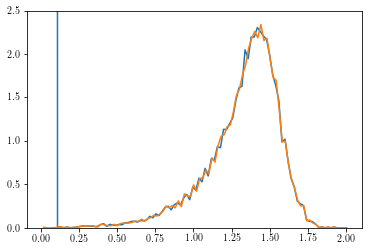

In [120]:
h, b = np.histogram((np.abs(HMat.data)), bins=100)
h2, b2 = np.histogram(np.abs(HMat.diagonal()), bins = 100)
f, ax = plt.subplots()
ax.plot(0.5*(b[1:]+b[:-1]), h/(np.sum(h)*(b[1]-b[0])) / HMat.shape[0] * HMat.size)
ax.plot(0.5*(b2[1:]+b2[:-1]), h2/(np.sum(h2)*(b2[1]-b2[0])))
ax.set_ylim(0, 2.5)

In [11]:
# run runSim.py 31 1 7 /tigress/ak20/QH/anisoMayCoulomb/

In [18]:
poop = np.load('/tigress/ak20/QH/anisoMayCoulomb/LL0/ar050/Nphi21_Ne7_sector3_alpha40_E.npy')

In [19]:
poop

array([-1.53765796, -1.52980402, -1.52980402, -1.51336212, -1.51336212,
       -1.50961547])

In [51]:
alp_arr = np.r_[1.0:4.01:0.1] # 31
asp_arr = np.array([0, 0.25, 0.5])
Ne_arr = np.array([6, 7, 8, 9, 10])

E0 = np.zeros((2, len(Ne_arr), len(asp_arr), len(alp_arr), 10, 6)) * np.nan
cf = 0
fol = '/tigress/ak20/QH/anisoMayCoulomb/'

for LL in [0, 1]:
    for cNe, Ne in enumerate(Ne_arr):
        Nphi = 3*Ne
        for casp, ar_factor in enumerate(asp_arr):
            for calp, alpha in enumerate(alp_arr):

                for sector in range(Ne):
                    try:
                        fil = 'Nphi{0:d}_Ne{1:d}_sector{2:d}_alpha{3:d}'.format(
                               Nphi, Ne, sector, int(round(10*alpha)))
                        dat = np.load(fol+'LL{0:d}/ar{1:03d}/'.format(
                                LL, int(round(100*ar_factor)))+fil+'_E.npy')
                        E0[LL, cNe, casp, calp, sector, :] = dat
                    except FileNotFoundError:
                        pass

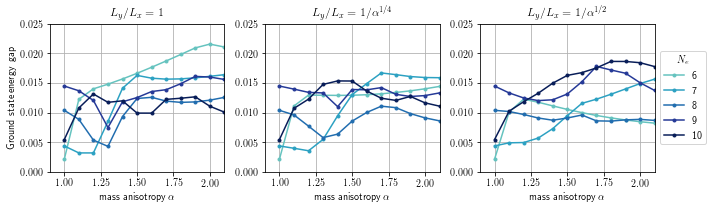

In [53]:
f, axs = plt.subplots(1, 3, figsize=(10, 3))
ylims = [[0.040, 0.065], [0, 0.025]]
LL = 1
spl_title = ['1', r'1/\alpha^{1/4}', r'1/\alpha^{1/2}']
for casp, ar_factor in enumerate(asp_arr):
    for cNe, Ne in enumerate(Ne_arr):
        E_Ne_ar = E0[LL, cNe, casp, :, :, :]
        E_Ne_ar = E_Ne_ar.reshape(31, 60)
        E_Ne_ar = np.sort(E_Ne_ar)
        axs[casp].plot(alp_arr, E_Ne_ar[:, 1] - E_Ne_ar[:, 0], 
                label=str(Ne), marker='.', color=plt.cm.YlGnBu((Ne-3)/7))


    axs[casp].set_xlabel(r'mass anisotropy $\alpha$')
    if casp == 0: axs[casp].set_ylabel(r'Ground state energy gap')
    axs[casp].set_xlim(0.9, 2.1)
    axs[casp].set_ylim(ylims[LL])
    if casp == 2: axs[casp].legend(loc='center left', title=r'$N_e$', 
                                      bbox_to_anchor=(1.00, 0.50))
    axs[casp].set_title(r'$ L_y / L_x = '+spl_title[casp]+'$')
    axs[casp].grid(True)

f.tight_layout()
f.savefig('/home/ak20/QH/plots/anisoMay_LL1.pdf', bbox_inches='tight', transparent=True)

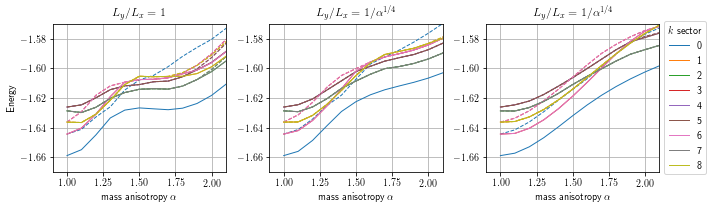

In [67]:
f, axs = plt.subplots(1, 3, figsize=(10, 3))
# ylims = [[-2.70, -2.35], [-1.91, -1.81]]
ylims = [[-2.40, -2.05], [-1.67, -1.57]]
# ms = ['.', 'x', '+']
ls = ['-', '--', ':']

LL = 1
Ne = 9
cNe = Ne - 6
spl_title = ['1', r'1/\alpha^{1/4}', r'1/\alpha^{1/4}']
for casp, ar_factor in enumerate(asp_arr):
    for sector in range(Ne):
        for Ex in range(2):
            E_Ne_ar = E0[LL, cNe, casp, :, sector, :]
            labx = str(sector) if Ex == 0 else '_nolegend_'
            axs[casp].plot(alp_arr, E_Ne_ar[:, Ex], label=labx,
                           ls=ls[Ex], lw = 1, color='C{0:d}'.format(sector))
        
    axs[casp].set_xlabel(r'mass anisotropy $\alpha$')
    if casp == 0: axs[casp].set_ylabel(r'Energy')
    axs[casp].set_xlim(0.9, 2.1)
    axs[casp].set_ylim(ylims[LL])
    if casp == 2: axs[casp].legend(loc='center left', title=r'$k$ sector', 
                                      bbox_to_anchor=(1.00, 0.50))
    axs[casp].set_title(r'$ L_y / L_x = '+spl_title[casp]+'$')
    axs[casp].grid(True)
f.tight_layout()
f.savefig('/home/ak20/QH/plots/anisoMay_E_Ne9_LL1.pdf', bbox_inches='tight', transparent=True)

In [20]:
E0 = np.zeros((len(Ne_arr), len(asp_arr), len(alp_arr), 8, 6)) * np.nan
for cNe, Ne in enumerate(Ne_arr[:]):
    Nphi = 3*Ne
    for casp, aspect_ratio in enumerate(asp_arr):
        for calp, alpha in enumerate(alp_arr):
            
            E_all = np.zeros(0)
            
            for sector in range(Ne):
                fil = 'Nphi{0:d}_Ne{1:d}_sector{2:d}_alpha{3:d}_ar{4:d}'.format(
                       Nphi, Ne, sector, int(round(10*alpha)), int(round(100*aspect_ratio)))
                try:
                    E0[cNe, casp, calp, sector, :] = np.load(fol+fil+'_E.npy')
                    cf += 1
#                     E_all = np.r_[E_all, dat]
                except FileNotFoundError:
                    pass
                
#             E_all.sort()
#             E0[cNe, casp, calp] = E_all[1] - E_all[0]

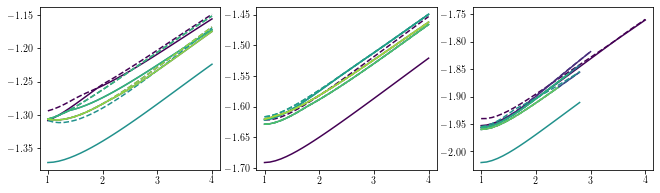

In [334]:
f, (ax, bx, cx) = plt.subplots(1, 3, figsize=(11, 3))

for sector in np.arange(7):
    ax.plot(alp_arr, E0[0, 1, :, sector, 0], color=plt.cm.viridis(sector/6))
    ax.plot(alp_arr, E0[0, 1, :, sector, 1], color=plt.cm.viridis(sector/6), ls='--')
    
    bx.plot(alp_arr, E0[1, 1, :, sector, 0], color=plt.cm.viridis(sector/7))
    bx.plot(alp_arr, E0[1, 1, :, sector, 1], color=plt.cm.viridis(sector/7), ls='--')
    
    cx.plot(alp_arr, E0[2, 1, :, sector, 0], color=plt.cm.viridis(sector/8))
    cx.plot(alp_arr, E0[2, 1, :, sector, 1], color=plt.cm.viridis(sector/8), ls='--')

In [40]:
def myfun(x, C, S):
    lC = len(C)
    lS = len(S)
    return np.sum(C*np.cos(2*np.pi*np.outer(x, np.arange(lC))) + \
                  S*np.cos(2*np.pi*np.outer(x, np.arange(lS))), axis=1)

C = np.random.randn(5)
S = np.random.randn(5)

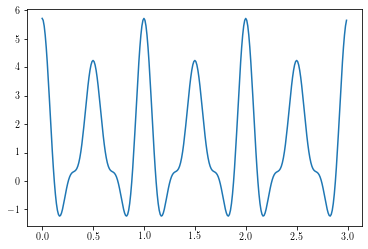

In [41]:
f, ax = plt.subplots()
ax.plot(np.r_[0:3:0.01], myfun(np.r_[0:3:0.01], C, S))

In [42]:
scipy.integrate.quad(myfun, 0, 1, (C, S))

(1.3831067735688094, 4.852275595212951e-10)

In [50]:
S*2*np.pi

array([ 9.86175363, -3.70501496,  7.41178403, -1.30339297,  3.9221096 ])